# EDA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD

In [2]:
import json

## Load and describe data

In [3]:
file = '/Users/gkhanna/Downloads/reviews_Home_and_Kitchen_5.json'

In [4]:

df_reviews = pd.read_json(file, orient='records', lines='True')

In [96]:
type(df_reviews)

pandas.core.frame.DataFrame

In [95]:
df_reviews.head(30)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0615391206,"[0, 0]",5,My daughter wanted this book and the price on ...,"10 19, 2013",APYOBQE6M18AA,Martin Schwartz,Best Price,1382140800
1,0615391206,"[0, 0]",5,I bought this zoku quick pop for my daughterr ...,"06 18, 2014",A1JVQTAGHYOL7F,Michelle Dinh,zoku,1403049600
2,0615391206,"[26, 27]",4,There is no shortage of pop recipes available ...,"05 5, 2013",A3UPYGJKZ0XTU4,mirasreviews,"Excels at Sweet Dessert Pops, but Falls Short ...",1367712000
3,0615391206,"[14, 18]",5,This book is a must have if you get a Zoku (wh...,"08 4, 2011",A2MHCTX43MIMDZ,"M. Johnson ""Tea Lover""",Creative Combos,1312416000
4,0615391206,"[0, 0]",4,This cookbook is great. I have really enjoyed...,"06 7, 2014",AHAI85T5C2DH3,PugLover,A must own if you own the Zoku maker...,1402099200
5,0615391206,"[0, 0]",5,If you have a Zoku Quick Pop maker (or two.......,"06 7, 2014",AXA9EVY6IJIZ5,"Robin Cline ""Solarobby""",Love it,1402099200
6,0615391206,"[2, 3]",5,This book is so beautifully illustrated and ea...,"07 2, 2012",A1SW2D234X11MS,"savinggrace ""savinggrace""",Beautifully illustrated recipe and instruction...,1341187200
7,0615391206,"[32, 39]",2,I bought this when I bought the pop maker. I t...,"12 8, 2011",A1ZH5ULI4SBO48,"S. G. ""s.g.""",Okay but you can figure it out yourself withou...,1323302400
8,0615391206,"[13, 13]",5,"The Zoku accessories are pricey, but the recip...","09 22, 2011",A1V13XAWO98C1J,"Stan ""Stan""","If you have the Zoku maker, buy this!",1316649600
9,0615391206,"[0, 0]",5,High quality book. Clear and helpful informati...,"06 1, 2014",A3842PXNQ1QRM9,Stephen Brem,Satisfaction opinion,1401580800


In [6]:
df_reviews.shape

(551682, 9)

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551682 entries, 0 to 551681
Data columns (total 9 columns):
asin              551682 non-null object
helpful           551682 non-null object
overall           551682 non-null int64
reviewText        551682 non-null object
reviewTime        551682 non-null object
reviewerID        551682 non-null object
reviewerName      546729 non-null object
summary           551682 non-null object
unixReviewTime    551682 non-null int64
dtypes: int64(2), object(7)
memory usage: 37.9+ MB


In [8]:
df_reviews.columns

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')

In [9]:
df_reviews.describe()

,overall,unixReviewTime
count,551682.000000,5.516820e+05
mean,4.316655,1.348687e+09
std,1.110749,6.120238e+07
min,1.000000,9.572256e+08
25%,4.000000,1.331770e+09
50%,5.000000,1.367626e+09
75%,5.000000,1.388880e+09
max,5.000000,1.406074e+09


In [10]:
df_reviews.to_pickle('home_df.pkl')

## Distribution of reviews by products (ASIN)

In [11]:
# Review counts for each ASIN
df_reviews['asin'].value_counts()

B00006JSUA    1064
B001N07KUE     921
B00006IUWA     662
B00005B8K5     656
B000QFDNP8     634
B0006HUYGM     612
B00009R66F     608
B00004SPEU     592
B0000CFMZN     572
B000M8YMEU     550
B00005IBX9     536
B002YD99Y4     505
B000TKDQ5C     482
B004412GTO     478
B000EGA6QI     478
B00065L6CU     468
B00004SPZV     449
B000GXZ2GS     439
B001T4ZAX8     437
B001L5TVGW     432
B000N4WMUE     418
B00005MF9C     417
B000638D32     412
B00004OCO9     412
B000DLB2FI     410
B002PY7AYS     400
B001PB8EJ2     399
B00004OCKR     397
B0000CBJJL     397
B005M8HPPS     391
              ... 
B0088BSPY6       5
B000AUQDIS       5
B00004WHQL       5
B001E6KOV4       5
B00091PMWQ       5
B000MBPJHG       5
B000K8WOQU       5
B0017145YS       5
B0049WPS02       5
B001CQQSBG       5
B001DIXA0K       5
B000G0QL2K       5
B000SSS4YI       5
B002A9J802       5
B00497E2OA       5
B002HRFLOE       5
B002MXY77U       5
B000N8NNQ2       5
B002X3J4OA       5
B001L4D0S8       5
B00DGH4LCM       5
B002DMLF48  

In [12]:
# How many unique ASIN's
df_reviews['asin'].unique()

array(['0615391206', '0689027818', '0912696591', ..., 'B00LAI4UYS',
       'B00LB18EKK', 'B00LBFUU12'], dtype=object)

In [13]:
# Unique ASIN's in the reviews
len(df_reviews['asin'].unique())

28237

In [14]:
y = df_reviews['asin'].value_counts().nlargest(20).index
x = df_reviews['asin'].value_counts().nlargest(20).values

In [15]:
# %matplotlib inline

Text(0,0.5,'ASIN ')

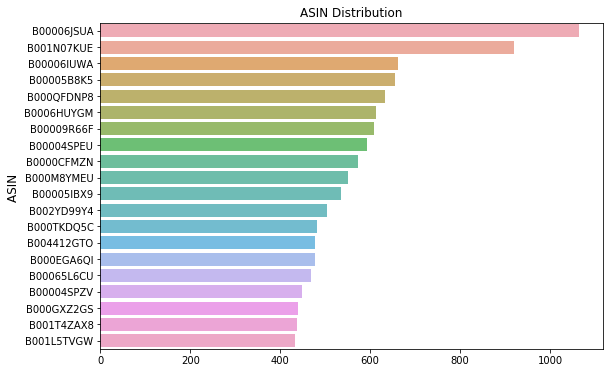

In [16]:
# Plot
plt.figure(figsize=(9,6))
ax= sns.barplot(x, y,data= df_reviews ,alpha=0.8 )
plt.title("ASIN Distribution")
plt.ylabel('ASIN ', fontsize=12)

## Distribution of reviews by reviewers

In [17]:
# Unique reviewers
len(df_reviews['reviewerName'].unique())

58903

Text(0,0.5,'Reviewers ')

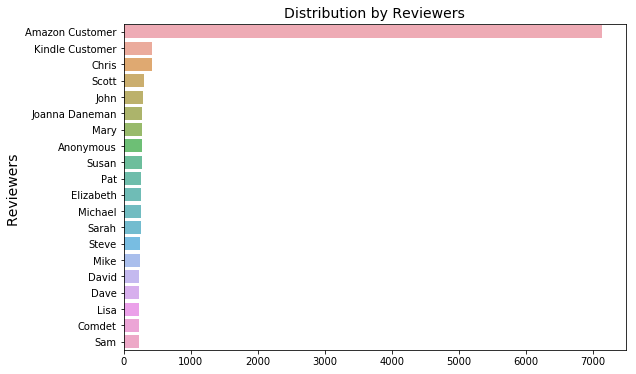

In [18]:
# Plot
y = df_reviews['reviewerName'].value_counts().nlargest(20).index
x = df_reviews['reviewerName'].value_counts().nlargest(20).values
plt.figure(figsize=(9,6))
ax= sns.barplot(x, y,data= df_reviews ,alpha=0.8 )
plt.title("Distribution by Reviewers", fontsize = 14)
plt.ylabel('Reviewers ', fontsize=14)

## Distribution by Ratings

In [19]:
# Unique ratings. Should be 5 but just checking
len(df_reviews['overall'].unique())

5

Text(0.5,0,'Ratings ')

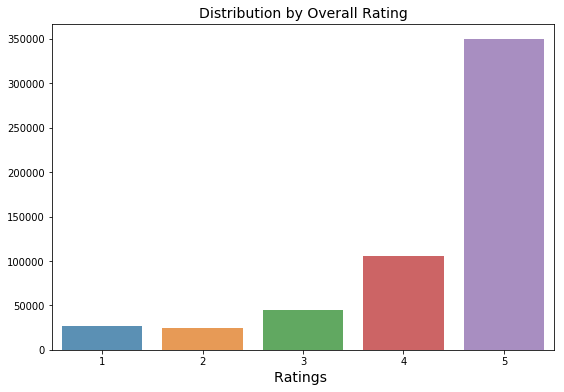

In [20]:
# Plot
x = df_reviews['overall'].value_counts().index
y = df_reviews['overall'].value_counts().values
plt.figure(figsize=(9,6))
ax= sns.barplot(x, y,data= df_reviews ,alpha=0.8 )
plt.title("Distribution by Overall Rating", fontsize = 14)
plt.xlabel('Ratings ', fontsize=14)

In [ ]:
# df_reviews['rev_value_count'] = df_reviews.reviewerName.groupby(df_reviews.reviewerName).transform('count')

In [ ]:
# df_reviews.head()

In [ ]:
# df_reviews = df_reviews.sort_values('rev_value_count', ascending = False)

In [ ]:
# df_reviews.head()

In [ ]:
# df_reviews['rev_mean_overall'] = df_reviews.overall.groupby(df_reviews.reviewerName).transform('mean')

In [ ]:
# df_reviews.head()

## Is there a correlation between review count (reviewer) and the overall ratings? 

In [23]:
grp2 = df_reviews.groupby('reviewerName').overall.agg(['mean', 'count'])

In [39]:
grp3 = grp2.sort_values(by = ['count'], ascending=False)[:40]

In [40]:
# grp3

,mean,count
reviewerName,,
Amazon Customer,4.294983,7136
Kindle Customer,4.431981,419
Chris,4.237410,417
Scott,4.126214,309
John,4.252595,289
Joanna Daneman,4.485507,276
Mary,4.465455,275
Anonymous,4.061818,275
Susan,4.445693,267


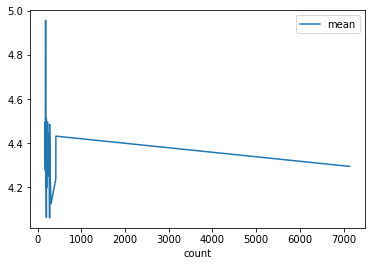

In [41]:
grp3.plot(x='count', y='mean')

### "Amazon Customer" is messing with the results.

In [43]:
# leaving out Amazon customer
grp4 = grp2.sort_values(by = ['count'], ascending=False)[1:40]

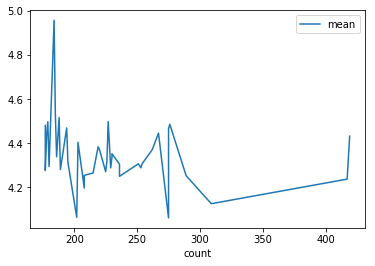

In [44]:
grp4.plot(x='count', y='mean')

In [45]:
grp4.corr()

,mean,count
mean,1.000000,-0.224043
count,-0.224043,1.000000


### Seems that the folks that give more reviews tend to give more balanced reviews

In [46]:
grp2.corr()

,mean,count
mean,1.00000,0.00713
count,0.00713,1.00000


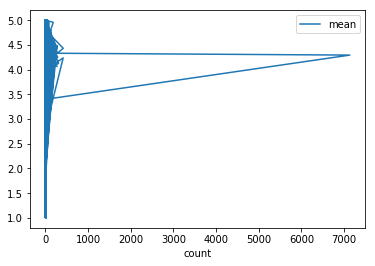

In [47]:
grp2.plot(x='count', y='mean')

### Rating trends for folks that do not give a lot of reviews

In [83]:
grp5 = grp2.sort_values(by = ['count'])[:200]

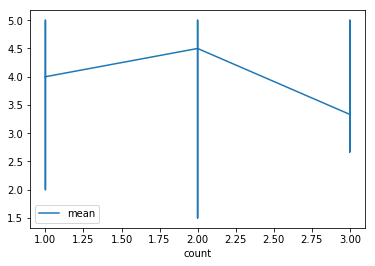

In [84]:
grp5.plot(x='count', y='mean')

### Folks with low number of reviews have more variance in the ratings

In [85]:
type(grp5)

pandas.core.frame.DataFrame

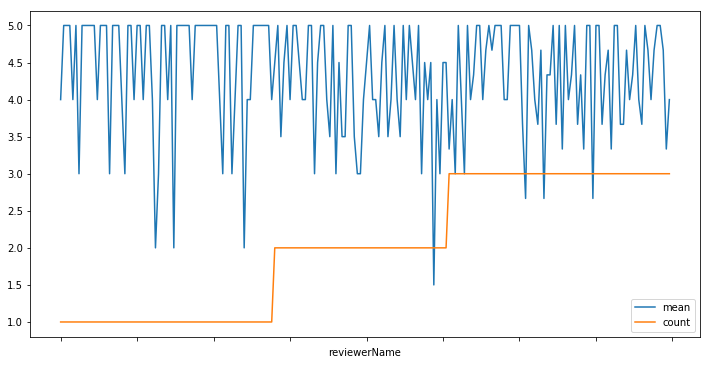

In [86]:
grp5.plot(figsize=(12,6))

In [87]:
type(df_reviews)

pandas.core.frame.DataFrame

## Looking at "helpful"

In [92]:
df_reviews.helpful.apply(lambda x: x[0]).nlargest(20)

396128    52176
277998     6128
179554     5247
203043     5081
299184     5034
213534     4736
44832      3941
279057     3716
282475     2777
112700     2618
480671     2282
96663      2247
146829     2108
337771     2029
15716      1896
285285     1862
336588     1751
396068     1719
396086     1683
179733     1642
Name: helpful, dtype: int64

In [93]:
df_reviews.helpful.apply(lambda x: x[1]).nlargest(20)

396128    52861
277998     6174
179554     5307
203043     5126
299184     5088
213534     4768
44832      4009
279057     3787
282475     2817
112700     2714
480671     2523
96663      2330
146829     2142
337771     2066
396068     1931
15716      1914
396086     1890
285285     1875
336588     1798
179733     1699
Name: helpful, dtype: int64

Examining a review with 52861 helpfuls

In [101]:
df_reviews.iloc[396128].reviewText

'For decades I have been trying to come up with an ideal way to slice a banana.  "Use a knife!" they say.  Well...my parole officer won\'t allow me to be around knives.  "Shoot it with a gun!"  Background check...HELLO!  I had to resort to carefully attempt to slice those bananas with my bare hands.  99.9% of the time, I would get so frustrated that I just ended up squishing the fruit in my hands and throwing it against the wall in anger. Then, after a fit of banana-induced rage, my parole officer introduced me to this kitchen marvel and my life was changed.  No longer consumed by seething anger and animosity towards thick-skinned yellow fruit, I was able to concentrate on my love of theatre and am writing a musical play about two lovers from rival gangs that just try to make it in the world.  I think I\'ll call it South Side Story.Banana slicer...thanks to you, I see greatness on the horizon.'

In [102]:
df_reviews.iloc[396128]

asin                                                     B0047E0EII
helpful                                              [52176, 52861]
overall                                                           5
reviewText        For decades I have been trying to come up with...
reviewTime                                               03 3, 2011
reviewerID                                           A1TTA1UUGY4WY4
reviewerName                                                   SW3K
summary                        No more winning for you, Mr. Banana!
unixReviewTime                                           1299110400
Name: 396128, dtype: object

The one above seems fake news. Trying the next

In [103]:
df_reviews.iloc[277998]

asin                                                     B001LYFBHG
helpful                                                [6128, 6174]
overall                                                           5
reviewText        Note: I have updated this review in March of 2...
reviewTime                                               08 7, 2009
reviewerID                                           A17V9XL4CWTQ6G
reviewerName                                               Chandler
summary           The top steam mops: Results of steam mop first...
unixReviewTime                                           1249603200
Name: 277998, dtype: object

In [104]:
df_reviews.iloc[277998].reviewText

'Note: I have updated this review in March of 2013 comparing this mop to Eureka\'s new mop called "Two in One" I do not like Eureka\'s new steam mop model 150A as much as this one (I actually don\'t like Eureka\'s model 150 at all) but I"ve added the notes to my review as well as a few other new mops we\'ve gotten to try out. We have a second home now and I\'m in the market for a new steam mop. In trying out new ones, even the new Eureka one, I still like this old model 313A the best.Know going in If you get the Envirosteamer, know that, though it cleans the best, the first two times you use it the water goes through holes faster than it will in subsequent uses, so it will go through steam faster and your floors will be wetter than normal. Enough people wrote me to know this happened the first one or two times as it did my first time of use,  then after that the mop was normal, our floors are great  and it lasts waaaah longer. We don\'t know why.  Just know that going in.  After the fi

In [105]:
df_reviews.iloc[277998].summary

'The top steam mops: Results of steam mop first hand comparisons & studying of comps'

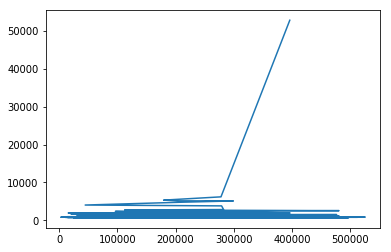

In [108]:
df_reviews.helpful.apply(lambda x: x[1]).nlargest(200).plot()